In [1]:
!pip install gdelt
import gdelt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

here
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
children_mortality = pd.read_csv('/content/drive/MyDrive/children_mortality_rate.csv')
adult_mortality = pd.read_csv('/content/drive/MyDrive/adult_mortality_rate.csv')
suicide_rates = pd.read_csv('/content/drive/MyDrive/suicide_rates.csv')
poverty = pd.read_csv('/content/drive/MyDrive/poverty.csv')

In [3]:
children_mortality['Value_Cleaned'] = children_mortality['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'].astype(float)
children_mortality['Value_Cleaned'] = children_mortality['Value_Cleaned'] * 100

# Select the required columns
filtered_children_mortality = children_mortality[['Value_Cleaned', 'Location', 'Period']]
filtered_children_mortality = filtered_children_mortality.rename(columns={'Value_Cleaned': f'Value_children_mortality'})


In [4]:
suicide_rates['Value_Cleaned'] = suicide_rates['Value'].str.extract(r'([0-9]+\.[0-9]+)')

# Convert the extracted values to float for numerical operations
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'].astype(float)
suicide_rates['Value_Cleaned'] = suicide_rates['Value_Cleaned'] * 100

# Select the required columns
filtered_suicide_rates = suicide_rates[['Value_Cleaned', 'Location', 'Period']]
filtered_suicide_rates = filtered_suicide_rates.rename(columns={'Value_Cleaned': f'Value_suicide_rates'})


In [5]:
# filtering the columns
filtered_adult_mortality = adult_mortality[['Value', 'Location', 'Period']]
filtered_poverty = poverty[['Value', 'Location', 'Period']]
# Renaming the columns
filtered_adult_mortality = adult_mortality.rename(columns={'Value': 'Value_adult_mortality'})[['Value_adult_mortality', 'Location', 'Period']]
filtered_poverty = poverty.rename(columns={'Value': 'Value_poverty'})[['Value_poverty', 'Location', 'Period']]

In [6]:
merged_data = filtered_children_mortality.merge(filtered_adult_mortality, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_suicide_rates, on=['Location', 'Period'], how='inner')
merged_data = merged_data.merge(filtered_poverty, on=['Location', 'Period'], how='inner')

In [7]:
who_data = merged_data.groupby(['Location', 'Period']).sum().reset_index()

In [8]:
who_data.head()

,Location,Period,Value_children_mortality,Value_adult_mortality,Value_suicide_rates,Value_poverty
0,Afghanistan,2007,15030.0,7353,12960.0,11.61
1,Afghanistan,2013,12240.0,6336,10800.0,21.60
2,Afghanistan,2016,31590.0,19791,32400.0,67.23
3,Albania,2002,16200.0,8235,37260.0,81.27
4,Albania,2005,14580.0,8532,60480.0,83.97


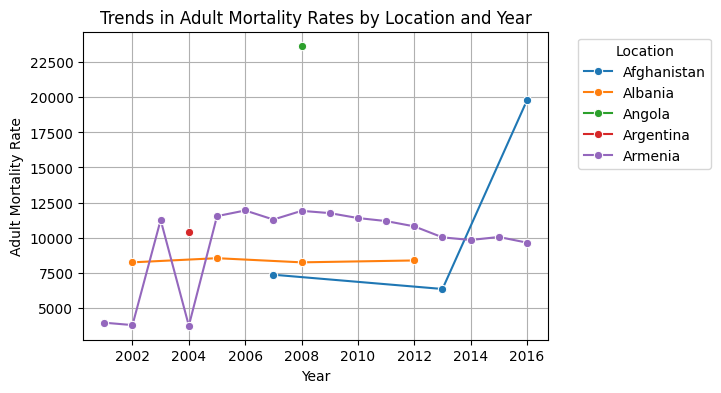

In [9]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_adult_mortality', hue='Location', marker='o')
plt.title('Trends in Adult Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Adult Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

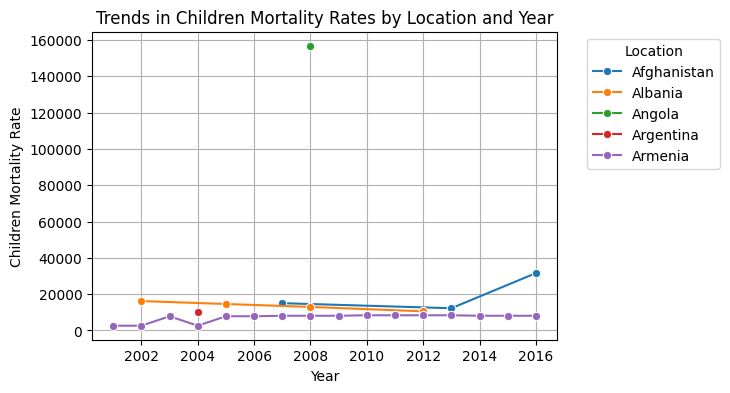

In [10]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_children_mortality', hue='Location', marker='o')
plt.title('Trends in Children Mortality Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Children Mortality Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

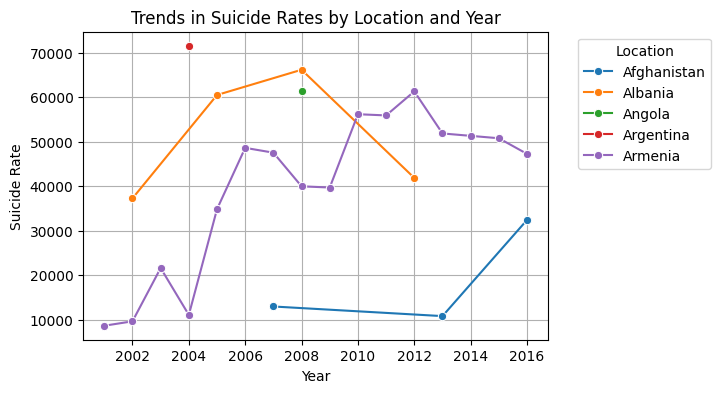

In [11]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_suicide_rates', hue='Location', marker='o')
plt.title('Trends in Suicide Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

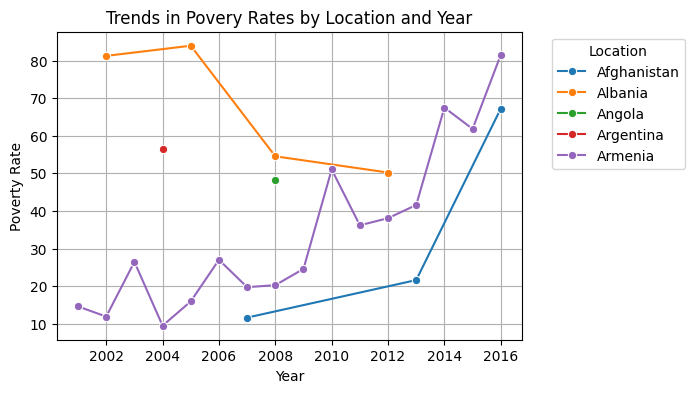

In [12]:
subset_locations = who_data['Location'].unique()[:5]
subset_data = who_data[who_data['Location'].isin(subset_locations)]

plt.figure(figsize=(6, 4))
sns.lineplot(data=subset_data, x='Period', y='Value_poverty', hue='Location', marker='o')
plt.title('Trends in Povery Rates by Location and Year')
plt.xlabel('Year')
plt.ylabel('Poverty Rate')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [13]:
who_data.isna().sum()

Location                    0
Period                      0
Value_children_mortality    0
Value_adult_mortality       0
Value_suicide_rates         0
Value_poverty               0
dtype: int64

In [14]:
import gdelt

In [ ]:
gd1 = gdelt.gdelt(version=1)
gkg_results = gd1.Search(['2015 03 15', '2015 04 15'], table='gkg')
gkg_df = pd.DataFrame(gkg_results)

In [ ]:
health_keyword = ['HEALTH_NEWS', 'HEALTH', 'DISEASE_OUTBREAK']
health_df = gkg_df[gkg_df['THEMES'].str.contains('|'.join(health_keyword), case=False, na=False)]
health_df.head()

In [ ]:
events_results = gd1.Search(['2015 03 21', '2015 03 23'], coverage=True, table='events')
events_df = pd.DataFrame(events_results)

In [ ]:
# Merge the DataFrames on the specified columns
events_df['GLOBALEVENTID'] = events_df['GLOBALEVENTID'].astype(str)

merged_df = pd.merge(events_df, health_df, left_on='GLOBALEVENTID', right_on='CAMEOEVENTIDS')

In [ ]:
relevant_columns = ['Year','ActionGeo_FullName', 'CAMEOCodeDescription', 'Actor1Name', 'Actor2Name']
gdelt_data = merged_df[relevant_columns]
gdelt_data.head()

In [ ]:
gdelt_data.isna().sum()

In [ ]:
gdelt_data = gdelt_data.dropna(subset=['ActionGeo_FullName', 'Actor1Name', 'Actor2Name'])
gdelt_data.isna().sum()

In [ ]:
final_data = pd.merge(who_data, gdelt_data, left_on=['Location', 'Period'], right_on=['ActionGeo_FullName', 'Year'], how='inner')


In [ ]:
final_data.head()

In [ ]:
# vrskata megju adult mortality i nastanite vo taa godina

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_adult_mortality', y='CAMEOCodeDescription', hue='Year', palette='viridis', s=100)
plt.title('Relationship between Adult Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_children_mortality', y='CAMEOCodeDescription', hue='Year', palette='coolwarm', s=100)
plt.title('Relationship between Children Mortality Rates and Event Types')
plt.xlabel('Mortality Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='magma', s=100)
plt.title('Relationship between Suicide Rates and Event Types')
plt.xlabel('Suicide Rates')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='Value_suicide_rates', y='CAMEOCodeDescription', hue='Year', palette='inferno', s=100)
plt.title('Relationship between Poverty and Event Types')
plt.xlabel('Poverty')
plt.ylabel('Event Types')
plt.legend(title='Year')
plt.show()